# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_MyTelkomsel_1.csv")
df.head()

,userName,score,at,content
0,Hendri Siti,5,2024-05-04 00:19:25,ok
1,rama dani,5,2024-05-04 00:17:36,TOP banget 👍 saran saya agar ditambahkan fitur...
2,zurdy bagus setiawan,5,2024-05-04 00:14:20,combo sakti the best
3,Asuka Tomiyoshi,1,2024-05-04 00:13:18,Paket internet malam kenapa dihilangkan sih 😡.
4,Hatieli Bll_02,5,2024-05-04 00:06:08,good


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,ok,Hendri Siti,2024-05-04 00:19:25
1,TOP banget 👍 saran saya agar ditambahkan fitur...,rama dani,2024-05-04 00:17:36
2,combo sakti the best,zurdy bagus setiawan,2024-05-04 00:14:20
3,Paket internet malam kenapa dihilangkan sih 😡.,Asuka Tomiyoshi,2024-05-04 00:13:18
4,good,Hatieli Bll_02,2024-05-04 00:06:08
...,...,...,...
194,mantap,Zoelkifli Zoel,2024-05-03 12:09:28
195,"Telkomsel lawak ya ,mo beli paket kuota tapi g...",Kiki Angdika,2024-05-03 12:08:05
196,Paket mahal sinyal susah,iis Doanx,2024-05-03 12:07:39
197,lemot,Uchiha Fann,2024-05-03 12:05:52


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   199 non-null    object
 1   userName  199 non-null    object
 2   at        199 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,199,199,199
unique,187,197,199
top,bagus,Pengguna Google,2024-05-04 00:19:25
freq,7,3,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(199, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(187, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,ok,Hendri Siti,2024-05-04 00:19:25
1,top banget saran saya agar ditambahkan fitur s...,rama dani,2024-05-04 00:17:36
2,combo sakti the best,zurdy bagus setiawan,2024-05-04 00:14:20
3,paket internet malam kenapa dihilangkan sih,Asuka Tomiyoshi,2024-05-04 00:13:18
4,good,Hatieli Bll_02,2024-05-04 00:06:08
...,...,...,...
193,lelet,Aone planet,2024-05-03 12:09:48
195,telkomsel lawak ya mo beli paket kuota tapi ga...,Kiki Angdika,2024-05-03 12:08:05
196,paket mahal sinyal susah,iis Doanx,2024-05-03 12:07:39
197,lemot,Uchiha Fann,2024-05-03 12:05:52


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,ok,Hendri Siti,2024-05-04 00:19:25
1,top banget saran saya agar ditambahkan fitur s...,rama dani,2024-05-04 00:17:36
2,combo sakti the best,zurdy bagus setiawan,2024-05-04 00:14:20
3,paket internet malam kenapa dihilangkan sih,Asuka Tomiyoshi,2024-05-04 00:13:18
4,good,Hatieli Bll_02,2024-05-04 00:06:08
...,...,...,...
193,lelet,Aone planet,2024-05-03 12:09:48
195,telkomsel lawak ya mo beli paket kuota tapi ti...,Kiki Angdika,2024-05-03 12:08:05
196,paket mahal sinyal susah,iis Doanx,2024-05-03 12:07:39
197,lemot,Uchiha Fann,2024-05-03 12:05:52


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,,Hendri Siti,2024-05-04 00:19:25
1,top banget saran ditambahkan fitur get contact...,rama dani,2024-05-04 00:17:36
2,combo sakti the best,zurdy bagus setiawan,2024-05-04 00:14:20
3,paket internet malam dihilangkan sih,Asuka Tomiyoshi,2024-05-04 00:13:18
4,good,Hatieli Bll_02,2024-05-04 00:06:08
...,...,...,...
193,lelet,Aone planet,2024-05-03 12:09:48
195,telkomsel lawak mo beli paket kuota tidak yang...,Kiki Angdika,2024-05-03 12:08:05
196,paket mahal sinyal susah,iis Doanx,2024-05-03 12:07:39
197,lemot,Uchiha Fann,2024-05-03 12:05:52


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0                                                     []
1      [top, banget, saran, ditambahkan, fitur, get, ...
2                              [combo, sakti, the, best]
3             [paket, internet, malam, dihilangkan, sih]
4                                                 [good]
                             ...                        
193                                              [lelet]
195    [telkomsel, lawak, mo, beli, paket, kuota, tid...
196                        [paket, mahal, sinyal, susah]
197                                              [lemot]
198    [kualitas, jaringan, sangat, baik, semoga, ter...
Name: content, Length: 187, dtype: object

In [19]:
# Steamming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    stemmed_words = [stemmer.stem(w) for w in text_cleaning]
    return " ".join(stemmed_words)

tokenized = tokenized.apply(stemming)

tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MyTelkomsel_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MyTelkomsel_1.csv', encoding = 'latin1')
df_clean

,content
0,NaN
1,top banget saran tambah fitur get contact agar...
2,combo sakti the best
3,paket internet malam hilang sih
4,good
...,...
182,lelet
183,telkomsel lawak mo beli paket kuota tidak yang...
184,paket mahal sinyal susah
185,lot


# **Translate**

In [21]:
# Menginstall Library easynmt
!pip install -U easynmt

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [25]:
import pandas as pd
from easynmt import EasyNMT

In [22]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_MyTelkomsel_1.csv', encoding='latin1')

In [23]:
source_lang = 'id'  # Replace with the source language of your data
target_lang = 'en'  # Replace with the target language

In [26]:
model = EasyNMT('opus-mt')  # You can choose a different model name here

11.9kB [00:00, 12.4MB/s]                   


In [29]:
df2 = df_clean.fillna(method = 'bfill')
df2

,content
0,top banget saran tambah fitur get contact agar...
1,top banget saran tambah fitur get contact agar...
2,combo sakti the best
3,paket internet malam hilang sih
4,good
...,...
182,lelet
183,telkomsel lawak mo beli paket kuota tidak yang...
184,paket mahal sinyal susah
185,lot


In [30]:
df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MyTelkomsel_1.csv')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/42.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/801k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/796k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.26M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.38k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/291M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [31]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MyTelkomsel_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...
1,1,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...
2,2,combo sakti the best,The Great Combo of the best
3,3,paket internet malam hilang sih,"The night internet package is gone, though."
4,4,good,good
...,...,...,...
182,182,lelet,It's slow.
183,183,telkomsel lawak mo beli paket kuota tidak yang...,Telkomsel lawak mo buys one less sane quota pa...
184,184,paket mahal sinyal susah,expensive packages The signal is difficult
185,185,lot,lot


# **Labeling**

In [32]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_MyTelkomsel_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...
1,1,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...
2,2,combo sakti the best,The Great Combo of the best
3,3,paket internet malam hilang sih,"The night internet package is gone, though."
4,4,good,good
...,...,...,...
182,182,lelet,It's slow.
183,183,telkomsel lawak mo beli paket kuota tidak yang...,Telkomsel lawak mo buys one less sane quota pa...
184,184,paket mahal sinyal susah,expensive packages The signal is difficult
185,185,lot,lot


In [33]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [34]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 76
Netral = 57
Negatif = 54

Total Data Seluruhnya : 187


In [36]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,Positif
1,1,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,Positif
2,2,combo sakti the best,The Great Combo of the best,Positif
3,3,paket internet malam hilang sih,"The night internet package is gone, though.",Netral
4,4,good,good,Positif
...,...,...,...,...
182,182,lelet,It's slow.,Negatif
183,183,telkomsel lawak mo beli paket kuota tidak yang...,Telkomsel lawak mo buys one less sane quota pa...,Negatif
184,184,paket mahal sinyal susah,expensive packages The signal is difficult,Negatif
185,185,lot,lot,Netral


In [37]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,Positif
1,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,Positif
2,combo sakti the best,The Great Combo of the best,Positif
3,paket internet malam hilang sih,"The night internet package is gone, though.",Netral
4,good,good,Positif
...,...,...,...
182,lelet,It's slow.,Negatif
183,telkomsel lawak mo beli paket kuota tidak yang...,Telkomsel lawak mo buys one less sane quota pa...,Negatif
184,paket mahal sinyal susah,expensive packages The signal is difficult,Negatif
185,lot,lot,Netral


# **Visualisasi**


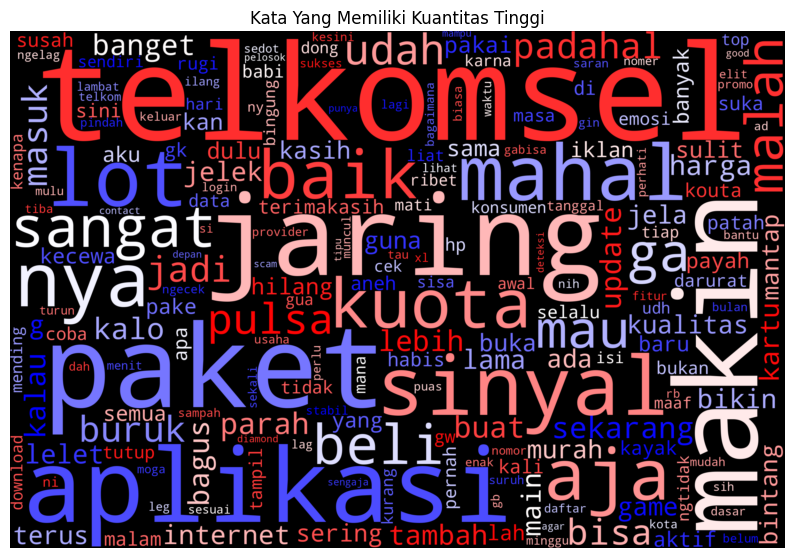

In [38]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


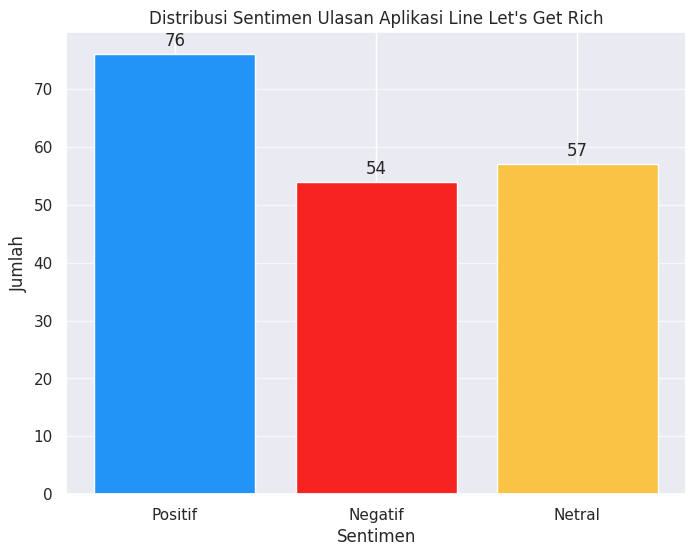

In [39]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Line Let's Get Rich")


In [40]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,Positif
1,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,Positif
2,combo sakti the best,The Great Combo of the best,Positif
4,good,good,Positif
6,telkomsel baik terkadang jaring lambat telkoms...,Good telkomsel. Sometimes the web is slow. The...,Positif
...,...,...,...
180,keren murah,Cool. Cheap.,Positif
182,lelet,It's slow.,Negatif
183,telkomsel lawak mo beli paket kuota tidak yang...,Telkomsel lawak mo buys one less sane quota pa...,Negatif
184,paket mahal sinyal susah,expensive packages The signal is difficult,Negatif


In [41]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,1
1,top banget saran tambah fitur get contact agar...,Top advice. Add a get connect feature so that ...,1
2,combo sakti the best,The Great Combo of the best,1
4,good,good,1
6,telkomsel baik terkadang jaring lambat telkoms...,Good telkomsel. Sometimes the web is slow. The...,1
...,...,...,...
180,keren murah,Cool. Cheap.,1
182,lelet,It's slow.,0
183,telkomsel lawak mo beli paket kuota tidak yang...,Telkomsel lawak mo buys one less sane quota pa...,0
184,paket mahal sinyal susah,expensive packages The signal is difficult,0


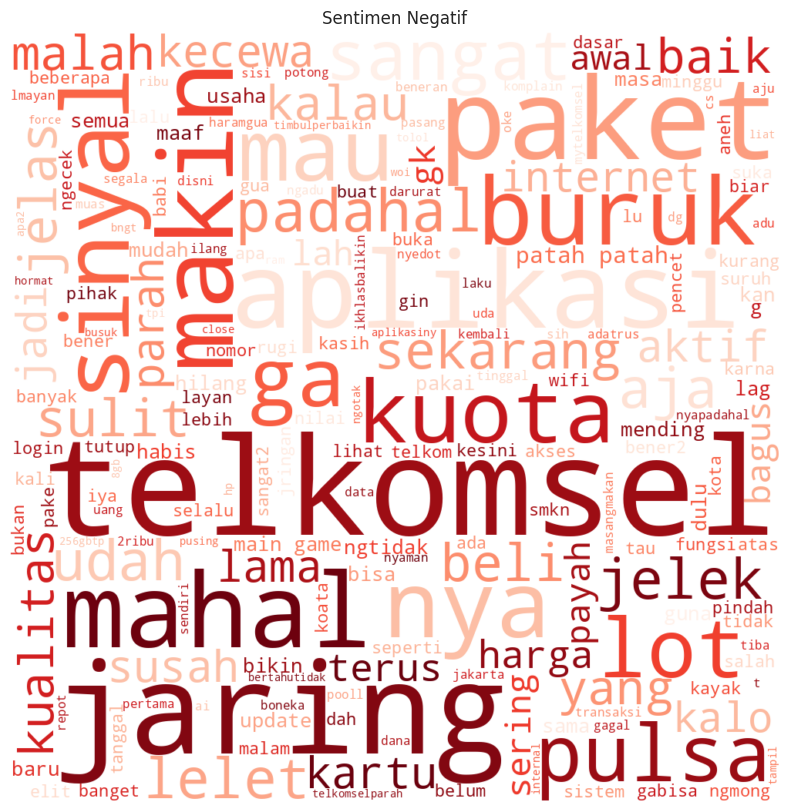

In [42]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

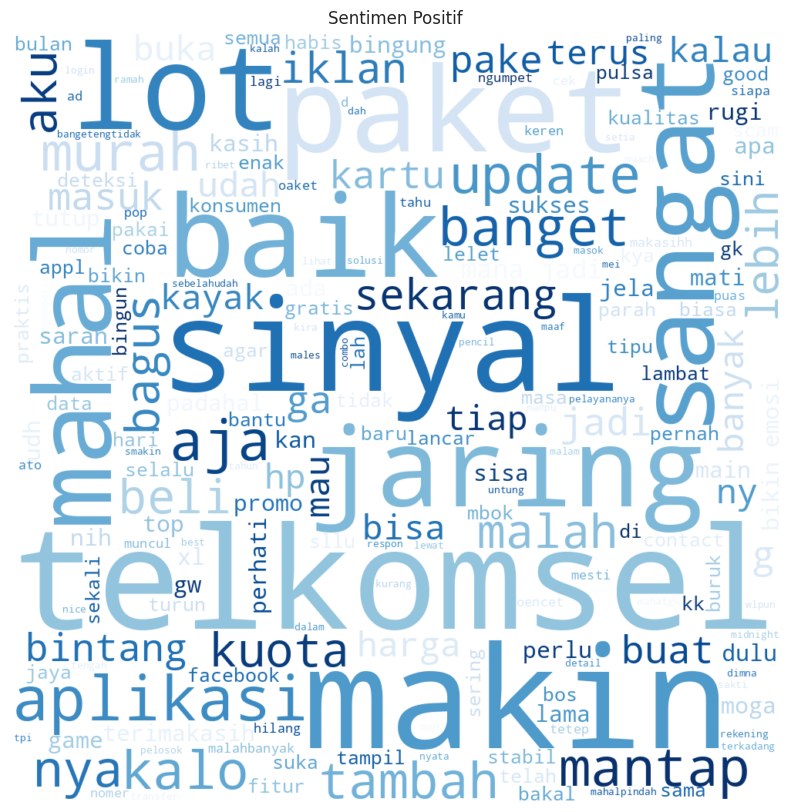

In [43]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [44]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    76
0    54
Name: count, dtype: int64

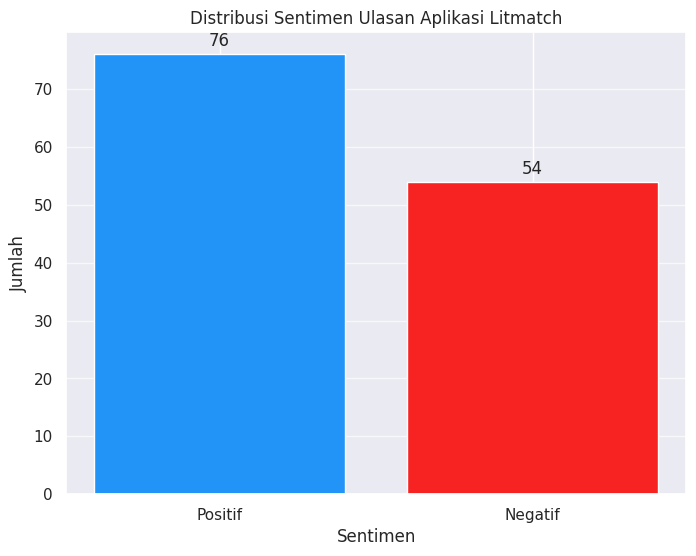

In [45]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Litmatch")

# **Data Preparation**

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

In [47]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [48]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [49]:
# Melakukan oversampling SMOTE pada data latih
smote = SMOTE(random_state = 42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_vec, y_train)

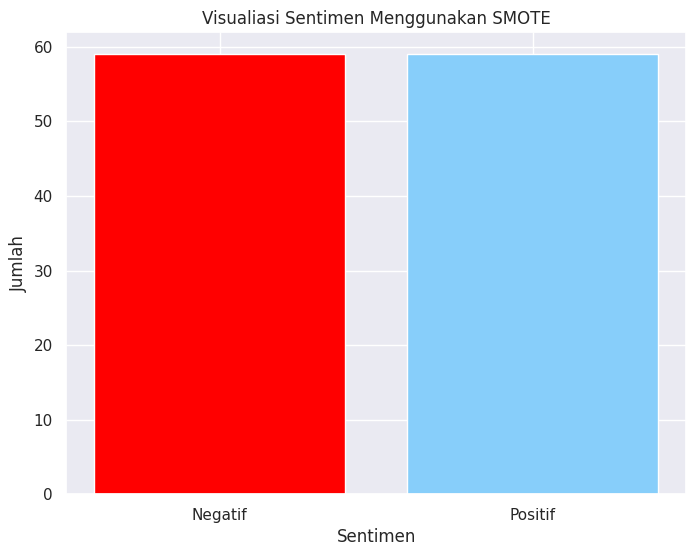

In [50]:
# Visualiasi data hasil resampling menggunakan SMOTE
sentimen_counts = y_train_resampled.value_counts()

plt.figure(figsize = (8, 6))
plt.bar(sentimen_counts.index, sentimen_counts.values, color = ['red', 'lightskyblue'])
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Visualiasi Sentimen Menggunakan SMOTE')
plt.xticks(sentimen_counts.index, ['Negatif', 'Positif'])
plt.show()

# **Modeling**


In [51]:
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_resampled, y_train_resampled)

MultinomialNB()

In [52]:
y_pred = naive_bayes.predict(X_test_vec)

In [53]:
# Evaluasi Model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred, target_names = ['Negatif', 'Positif'])

print("Akurasi Model Naive Bayes : ", accuracy)
print("\nLaporan Klasifikasi :\n", classification_rep)

Akurasi Model Naive Bayes :  0.6153846153846154

Laporan Klasifikasi :
               precision    recall  f1-score   support

     Negatif       0.47      0.89      0.62         9
     Positif       0.89      0.47      0.62        17

    accuracy                           0.62        26
   macro avg       0.68      0.68      0.62        26
weighted avg       0.74      0.62      0.62        26



# **Testing**


In [54]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : aplikasi jelek masa setiap isi pulsa kesedot terus
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [56]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = naive_bayes.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus ada paket 100k 80gb banyak bgt
Hasil Analisis Sentimen Untuk Teks Baru : Positif
